# Guide to completing this project


## Understanding the Problem
The Problem is relatively simple. Just analyze which parameters affect the HPI across US the most, and make viable solutions on how to tackle the problem with DS Life cycle. 

### What is HPI?
The House Price Index (HPI) is a broad measure of property prices in the United States. It is an analytical tool for depicting changes in the rate of mortage defaults, housing affordability, and prepayments while also indicating the house price trends.

### How the HPI is Used
HPI is an economic indicator used to keep track on broader economic trand and potential shift in the stock market.
The rise and fall of house prices can have big affects on the economy. Increase in prices gives rise to more jobs, 
stimulate confidence, and make the consumers spend more. Accordingly the aggregate demand is higher, which boosts Gross Domestics Product (GDP) and overall economic growth. 


## S&P/Case Shiller Index
It is a weighted repeat sales methodology proposed by `Karl Case`, `Robert Shiller` and `Alan Weiss`. This index can adjust to the quality of homes sold unlike simple averages.

### The Case-Shiller Methodology
`Sale Pair` is the basic data unit of the Case-Shiler indexes. Sale pairs are assigned to one of three price tiers-low, medium or high based on the first sale price in a sale pair. Low-Tier, Medium-Tier, and High-Tier indexes are produces from the data sets using the same methodology as for the `city composite indexes`.

#### City composite index
The S&P CoreLogic Case-Shiller Composite Home Price NSA Index seeks to measure the value of residential real estate in 20 major US metropolitan areas: Atlanta, Boston, Charlotte, Chicago, Cleveland, Dallas, Denver, Detroit, Las Vegas, Los Angeles, Miami, Minneapolis, New York, Phoenix, Portland, San Diego, San Francisco, Seattle, Tampa and Washington, D.C.
<br>
<br>
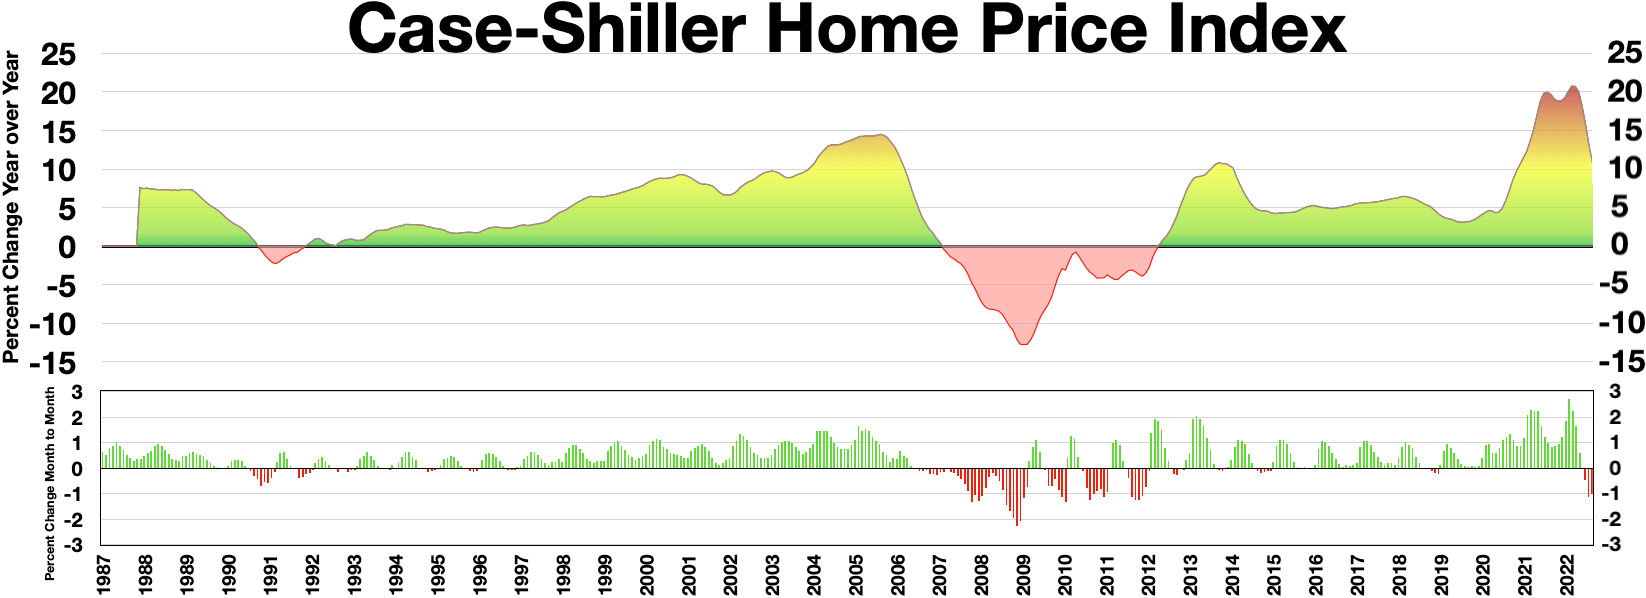
<br>
<br>

## DS Cycle

First of all, 
import libraries
import the datsets
check for null values and check for the information related to the datasets


Next, work on obtaining the final dataset for analysis and modeling.
Check for the type of features and handle the different type of features accordingly
Check the target variable => If the target variable is continuous, it is a Regression Problem.

### Data Analysis

Make inferences from data analysis about the relationship the independent variables have with the dependent variable. 
In depth data analysis is key with this project since we need to acquire all the factors that influences the HPI in the past 20 years across US.

### Modeling

Since it is a regression problem, a couple of handy algorithms can be used and the choice of ML algorithm is Random Forest Regressor, which can factor in the feature importances translating to the factors influencing the HPI


## Understanding the Data

`Supply Dataset`
>- Building Permits (Permit Number) - Number of building permits alloted
>- Construction Spending (Millions) The amout spent (in millions of USD) is a measure of the activity in the     construction industry
>- Housing Stars - This is a measure of units of new housing projects started in a given period.

`Demand Dataset` 
>- Mortgage Rates
>- USA GDP (Billions) Quarterly Real GDP (adjusted for inflation)
>- Unemployment Rate
>- Foreclosures on the mortgage - an indicator of the number of forecolsures in real estate

# Start of the project

In [1]:
#Importing Libraries for the project

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
#Importing dataset for the project

#Supply_data dataset
supply_data = pd.read_csv("/Users/vinayakmodgil/Desktop/HOME-LLC/house-price-csv/supply_data.csv")

#Demand_data dataset
demand_data = pd.read_csv("/Users/vinayakmodgil/Desktop/HOME-LLC/house-price-csv/demand_data.csv")

In [3]:
#Showing the first five rows of the supply dataset

supply_data.head()

,Unnamed: 0,Period,Permit_Number,construction,Homes_Sold,Housing_Starts
0,1,01-01-2000,1727,353065,873,1636
1,2,01-02-2000,1692,351933,856,1737
2,3,01-03-2000,1651,353452,900,1604
3,4,01-04-2000,1597,356188,841,1626
4,5,01-05-2000,1543,349907,857,1575


In [4]:
demand_data.head()

,DATE,UNEM_RATE,MORTGAGE,GDPC1,FORECLOSURES,HPI
0,2000-01-01,4.03,8.26,12935.252,1.95,101.34
1,2000-04-01,3.93,8.32,13170.749,1.97,103.67
2,2000-07-01,4.00,8.02,13183.890,2.09,105.79
3,2000-10-01,3.90,7.62,13262.250,2.23,108.27
4,2001-01-01,4.23,7.01,13219.251,2.34,110.48


In [5]:
supply_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      250 non-null    int64 
 1   Period          250 non-null    object
 2   Permit_Number   250 non-null    int64 
 3   construction    250 non-null    int64 
 4   Homes_Sold      250 non-null    int64 
 5   Housing_Starts  250 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 11.8+ KB


In [6]:
demand_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   DATE          84 non-null     object 
 1   UNEM_RATE     84 non-null     float64
 2   MORTGAGE      84 non-null     float64
 3   GDPC1         84 non-null     float64
 4   FORECLOSURES  84 non-null     float64
 5   HPI           84 non-null     float64
dtypes: float64(5), object(1)
memory usage: 4.1+ KB


In [7]:
#Convert DATE column in demand_data to datetime format
demand_data["DATE"] = pd.to_datetime(demand_data["DATE"])

#Convert period column in supply data to datetime format

supply_data["Period"] = pd.to_datetime(supply_data["Period"], format = "%d-%m-%Y").dt.strftime("%Y-%m-%d")
supply_data= supply_data.rename(columns={"Period":"DATE"})

supply_data["DATE"] = pd.to_datetime(supply_data["DATE"])

In [8]:
df = pd.merge(supply_data, demand_data)
df.to_csv("merged-df.csv", index=False)

In [9]:
df

,Unnamed: 0,DATE,Permit_Number,construction,Homes_Sold,Housing_Starts,UNEM_RATE,MORTGAGE,GDPC1,FORECLOSURES,HPI
0,1,2000-01-01,1727,353065,873,1636,4.03,8.26,12935.252,1.95,101.34
1,4,2000-04-01,1597,356188,841,1626,3.93,8.32,13170.749,1.97,103.67
2,7,2000-07-01,1542,337374,887,1463,4.00,8.02,13183.890,2.09,105.79
3,10,2000-10-01,1577,344095,933,1549,3.90,7.62,13262.250,2.23,108.27
4,13,2001-01-01,1699,348279,936,1600,4.23,7.01,13219.251,2.34,110.48
...,...,...,...,...,...,...,...,...,...,...,...
79,238,2019-10-01,1503,556693,706,1340,3.60,3.70,19202.310,2.34,212.47
80,241,2020-01-01,1536,589103,774,1617,3.80,3.52,18951.992,2.36,215.51
81,244,2020-04-01,1066,562339,570,934,13.07,3.24,17258.205,2.55,217.89
82,247,2020-07-01,1483,575451,979,1487,8.80,2.95,18560.774,2.80,222.84


In [10]:
#Making year, month and day columns from the DATE column
df["year"] = df["DATE"].dt.year
df["month"] =df["DATE"].dt.month
df["day"] = df["DATE"].dt.day

In [11]:
df = df.drop("DATE", axis=1)
df = df.drop("Unnamed: 0", axis=1)

In [12]:
df

,Permit_Number,construction,Homes_Sold,Housing_Starts,UNEM_RATE,MORTGAGE,GDPC1,FORECLOSURES,HPI,year,month,day
0,1727,353065,873,1636,4.03,8.26,12935.252,1.95,101.34,2000,1,1
1,1597,356188,841,1626,3.93,8.32,13170.749,1.97,103.67,2000,4,1
2,1542,337374,887,1463,4.00,8.02,13183.890,2.09,105.79,2000,7,1
3,1577,344095,933,1549,3.90,7.62,13262.250,2.23,108.27,2000,10,1
4,1699,348279,936,1600,4.23,7.01,13219.251,2.34,110.48,2001,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
79,1503,556693,706,1340,3.60,3.70,19202.310,2.34,212.47,2019,10,1
80,1536,589103,774,1617,3.80,3.52,18951.992,2.36,215.51,2020,1,1
81,1066,562339,570,934,13.07,3.24,17258.205,2.55,217.89,2020,4,1
82,1483,575451,979,1487,8.80,2.95,18560.774,2.80,222.84,2020,7,1


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Permit_Number   84 non-null     int64  
 1   construction    84 non-null     int64  
 2   Homes_Sold      84 non-null     int64  
 3   Housing_Starts  84 non-null     int64  
 4   UNEM_RATE       84 non-null     float64
 5   MORTGAGE        84 non-null     float64
 6   GDPC1           84 non-null     float64
 7   FORECLOSURES    84 non-null     float64
 8   HPI             84 non-null     float64
 9   year            84 non-null     int32  
 10  month           84 non-null     int32  
 11  day             84 non-null     int32  
dtypes: float64(5), int32(3), int64(4)
memory usage: 7.0 KB


In [14]:
#Finding the categorical and numerical continuous features
cat_feat = [feat for feat in df.columns if df[feat].dtype == "O"]
num_cont_feat = [feat for feat in df.columns if df[feat].dtype=="float"]

In [15]:
print(cat_feat)
print(num_cont_feat)

[]
['UNEM_RATE', 'MORTGAGE', 'GDPC1', 'FORECLOSURES', 'HPI']


In [16]:
df[num_cont_feat].head()

,UNEM_RATE,MORTGAGE,GDPC1,FORECLOSURES,HPI
0,4.03,8.26,12935.252,1.95,101.34
1,3.93,8.32,13170.749,1.97,103.67
2,4.00,8.02,13183.890,2.09,105.79
3,3.90,7.62,13262.250,2.23,108.27
4,4.23,7.01,13219.251,2.34,110.48


## Data Visualization

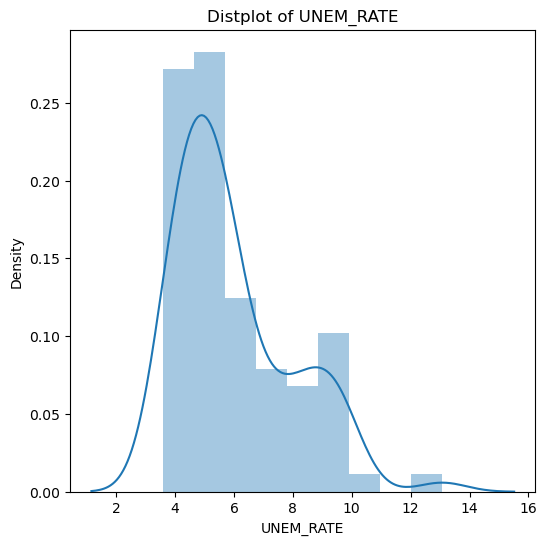

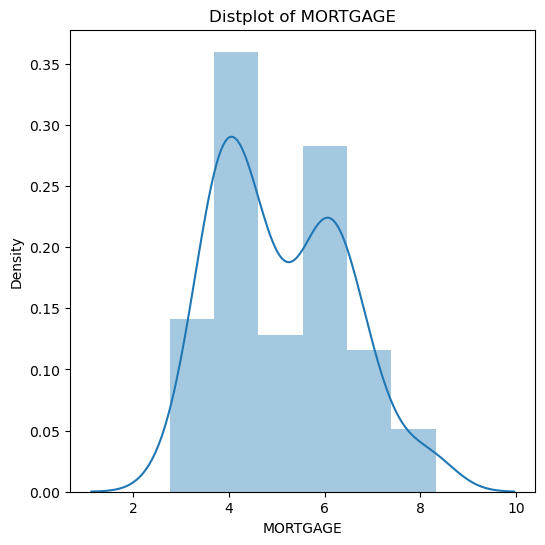

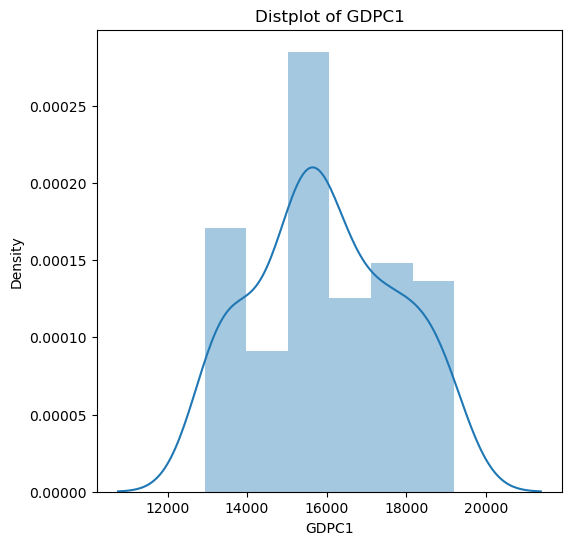

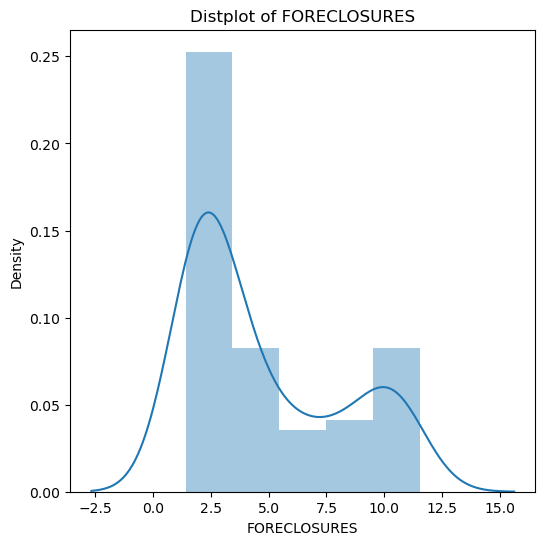

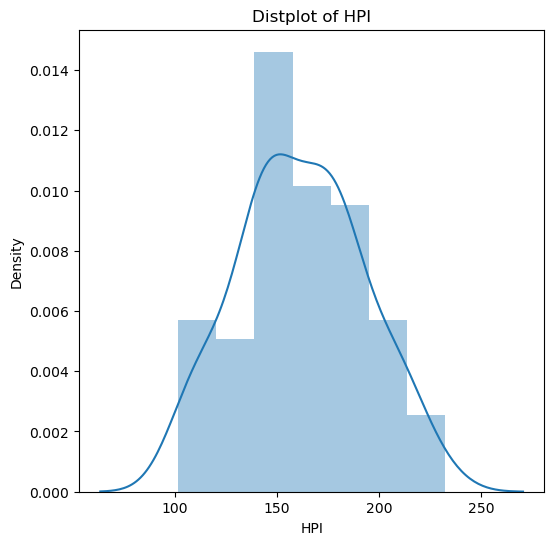

In [17]:
#Distplot for numerical continuous features

for feat in num_cont_feat:
    plt.figure(figsize=(6, 6))
    sns.distplot(df[feat])
    plt.title(f"Distplot of {feat}")

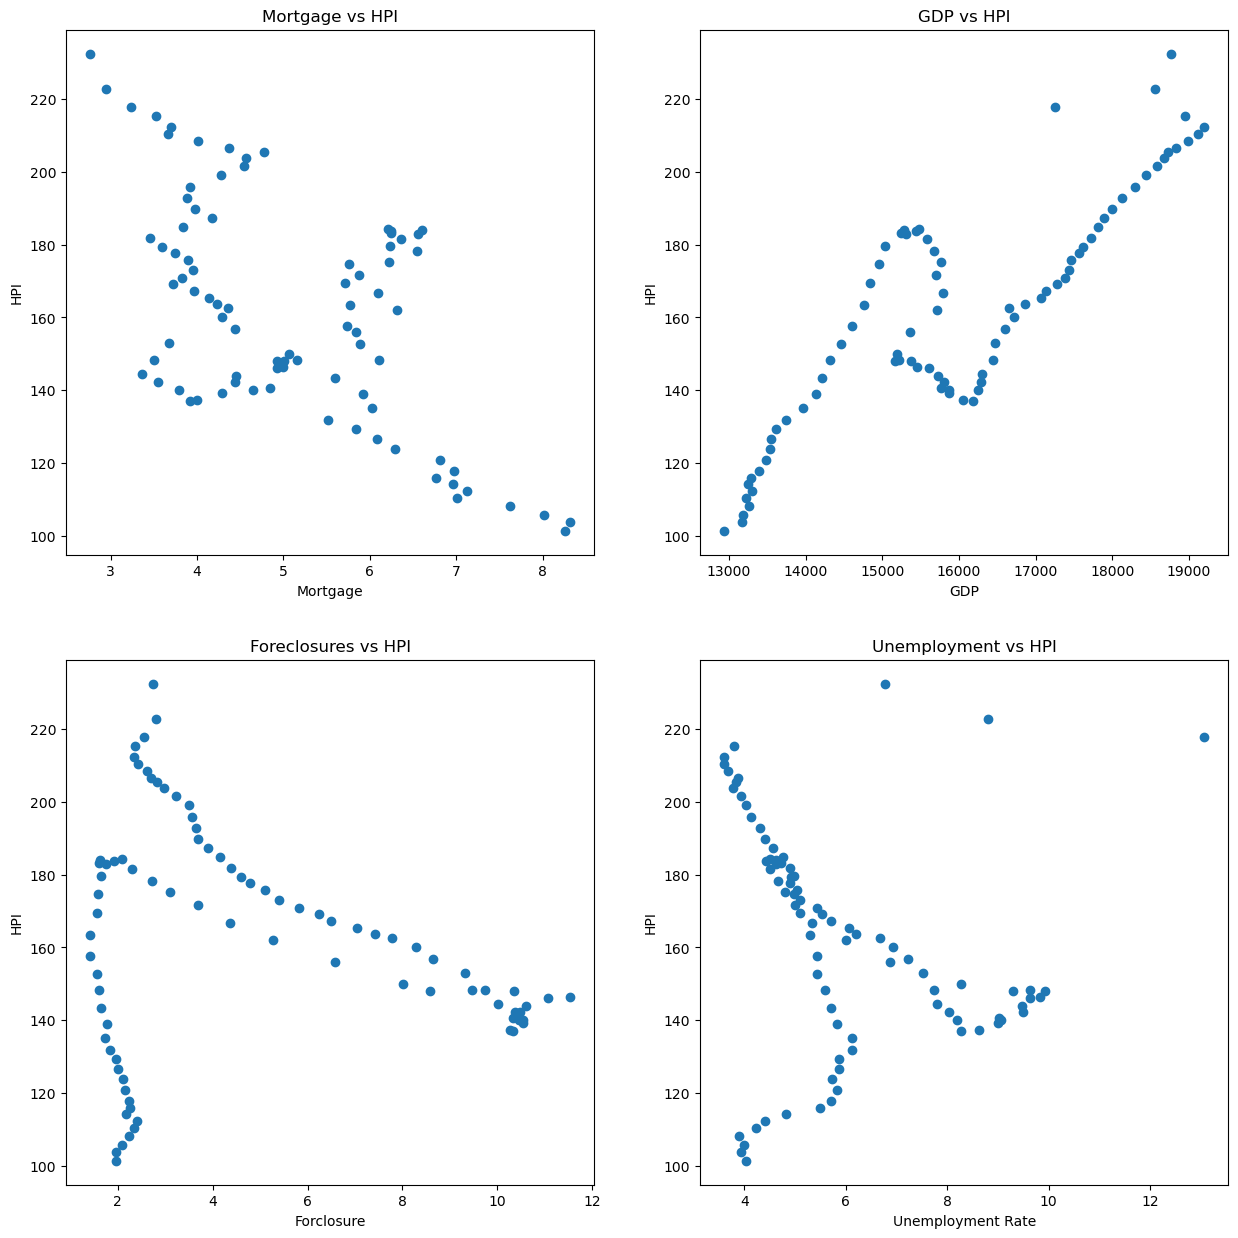

In [18]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))

#Plotting MORTGAGE with HPI
ax[0][0].scatter(df["MORTGAGE"], df["HPI"])
ax[0][0].set_xlabel("Mortgage")
ax[0][0].set_ylabel("HPI")
ax[0][0].set_title("Mortgage vs HPI")

#Plotting GPD with HPI
ax[0][1].scatter(df["GDPC1"], df["HPI"])
ax[0][1].set_xlabel("GDP")
ax[0][1].set_ylabel("HPI")
ax[0][1].set_title("GDP vs HPI")

#Plotting ForeClosure with HPI
ax[1][0].scatter(df["FORECLOSURES"], df["HPI"])
ax[1][0].set_xlabel("Forclosure")
ax[1][0].set_ylabel("HPI")
ax[1][0].set_title("Foreclosures vs HPI")

#Plotting Unemployment Rate with HPI
ax[1][1].scatter(df["UNEM_RATE"], df["HPI"])
ax[1][1].set_xlabel("Unemployment Rate")
ax[1][1].set_ylabel("HPI")
ax[1][1].set_title("Unemployment vs HPI")

plt.show()

In [19]:
df

,Permit_Number,construction,Homes_Sold,Housing_Starts,UNEM_RATE,MORTGAGE,GDPC1,FORECLOSURES,HPI,year,month,day
0,1727,353065,873,1636,4.03,8.26,12935.252,1.95,101.34,2000,1,1
1,1597,356188,841,1626,3.93,8.32,13170.749,1.97,103.67,2000,4,1
2,1542,337374,887,1463,4.00,8.02,13183.890,2.09,105.79,2000,7,1
3,1577,344095,933,1549,3.90,7.62,13262.250,2.23,108.27,2000,10,1
4,1699,348279,936,1600,4.23,7.01,13219.251,2.34,110.48,2001,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
79,1503,556693,706,1340,3.60,3.70,19202.310,2.34,212.47,2019,10,1
80,1536,589103,774,1617,3.80,3.52,18951.992,2.36,215.51,2020,1,1
81,1066,562339,570,934,13.07,3.24,17258.205,2.55,217.89,2020,4,1
82,1483,575451,979,1487,8.80,2.95,18560.774,2.80,222.84,2020,7,1


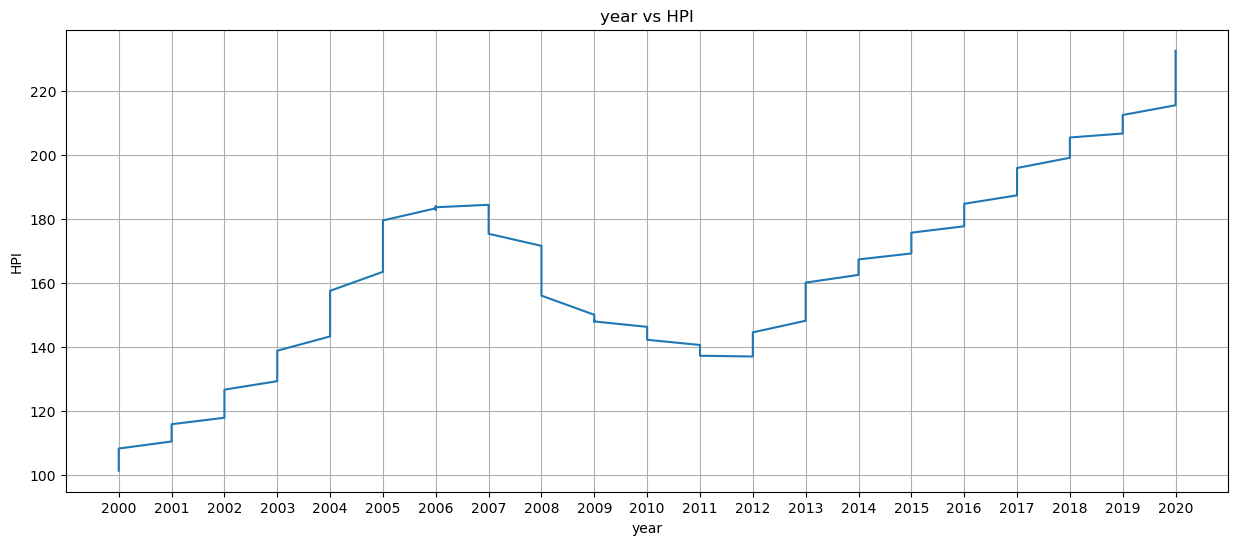

In [62]:
fig, ax = plt.subplots(figsize=(15, 6))

#Year vs HPI
ax.plot(df["year"], df["HPI"])
ax.set_xlabel("year")
ax.grid(True)
ax.set_ylabel("HPI")
ax.set_title("year vs HPI")
ax.set_xticks(np.arange(2000, 2021))

plt.show()

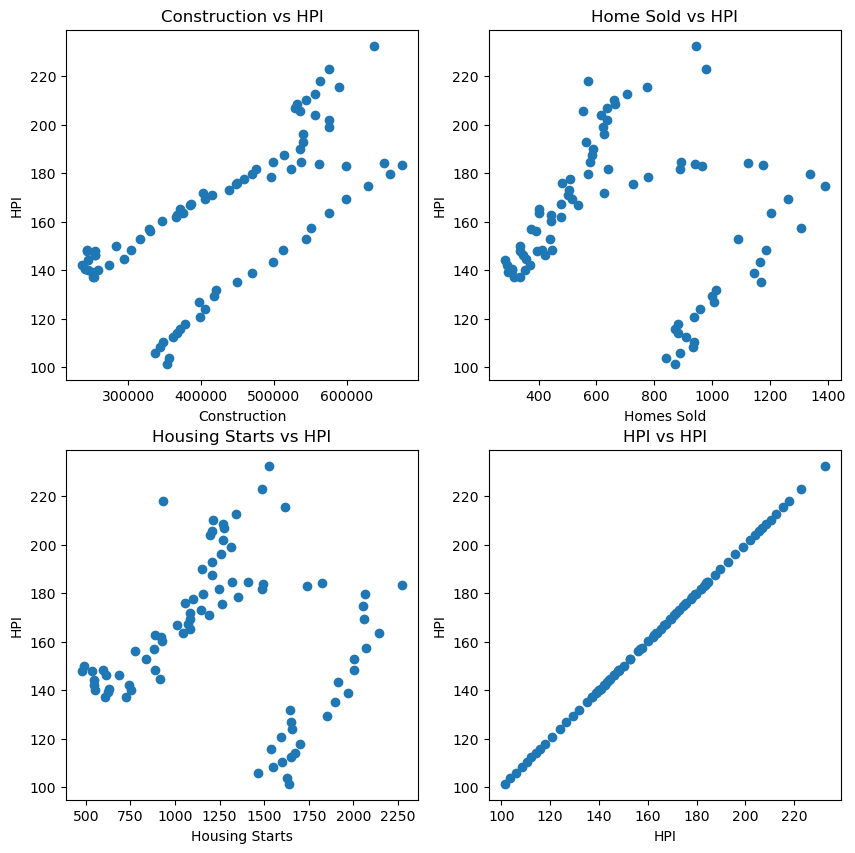

In [21]:
#Plotting the numerical features from supply_data with the target data

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

ax[0, 0].scatter(x=df["construction"], y=df["HPI"])
ax[0, 0].set_title("Construction vs HPI")
ax[0, 0].set_xlabel("Construction")
ax[0, 0].set_ylabel("HPI")

ax[0, 1].scatter(x=df["Homes_Sold"], y=df["HPI"])
ax[0, 1].set_title("Home Sold vs HPI")
ax[0, 1].set_xlabel("Homes Sold")
ax[0, 1].set_ylabel("HPI")

ax[1, 0].scatter(x=df["Housing_Starts"], y=df["HPI"])
ax[1, 0].set_title("Housing Starts vs HPI")
ax[1, 0].set_xlabel("Housing Starts")
ax[1, 0].set_ylabel("HPI")

ax[1, 1].scatter(x=df["HPI"], y=df["HPI"])
ax[1, 1].set_title("HPI vs HPI")
ax[1, 1].set_xlabel("HPI")
ax[1, 1].set_ylabel("HPI")

plt.show()

##### Construction Prices in the years 2000 - 2020


In [22]:
# Making a contruction group
year_grp_construction = df.groupby("year")["construction"].sum()
year_grp_construction

year
2000    1390722
2001    1447727
2002    1578330
2003    1757070
2004    2105437
2005    2461325
2006    2485998
2007    2005032
2008    1481643
2009    1026911
2010     990266
2011     987737
2012    1078220
2013    1294990
2014    1500285
2015    1707104
2016    1900885
2017    2127843
2018    2243408
2019    2159651
2020    2364031
Name: construction, dtype: int64

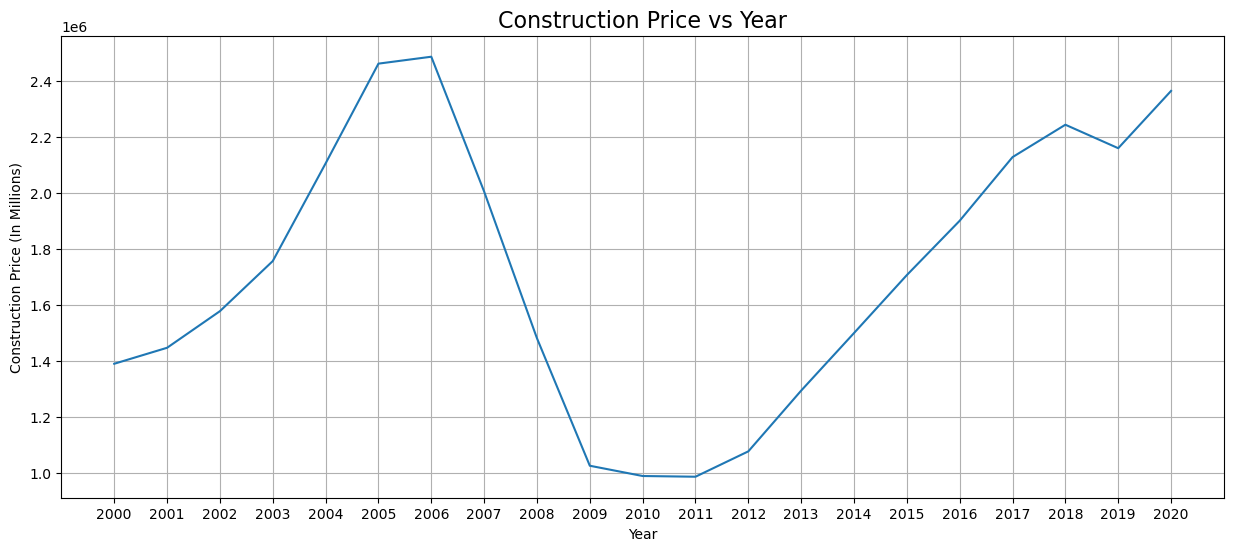

In [23]:
#Plotting the construction price with year
plt.figure(figsize=(15,6))
plt.plot(year_grp_construction)

plt.xticks(np.arange(2000, 2021))

plt.grid(True)

plt.xlabel("Year")
plt.ylabel("Construction Price (In Millions)")
plt.title("Construction Price vs Year", fontsize=16)

plt.show()

Note: <b>The price of construction in the years `2005 and 2006` hit a peak with price ranging from `2.5-2.6 million` and hits the lowest in the year `2011`

##### Housing projects started in the years 2000 - 2020

In [24]:
house_start_grp = df.groupby("year")["Housing_Starts"].sum()
house_start_grp

year
2000    6274
2001    6459
2002    6593
2003    7360
2004    7988
2005    8324
2006    7322
2007    5517
2008    3797
2009    2096
2010    2390
2011    2417
2012    3131
2013    3528
2014    4090
2015    4479
2016    4827
2017    4819
2018    4985
2019    5091
2020    5566
Name: Housing_Starts, dtype: int64

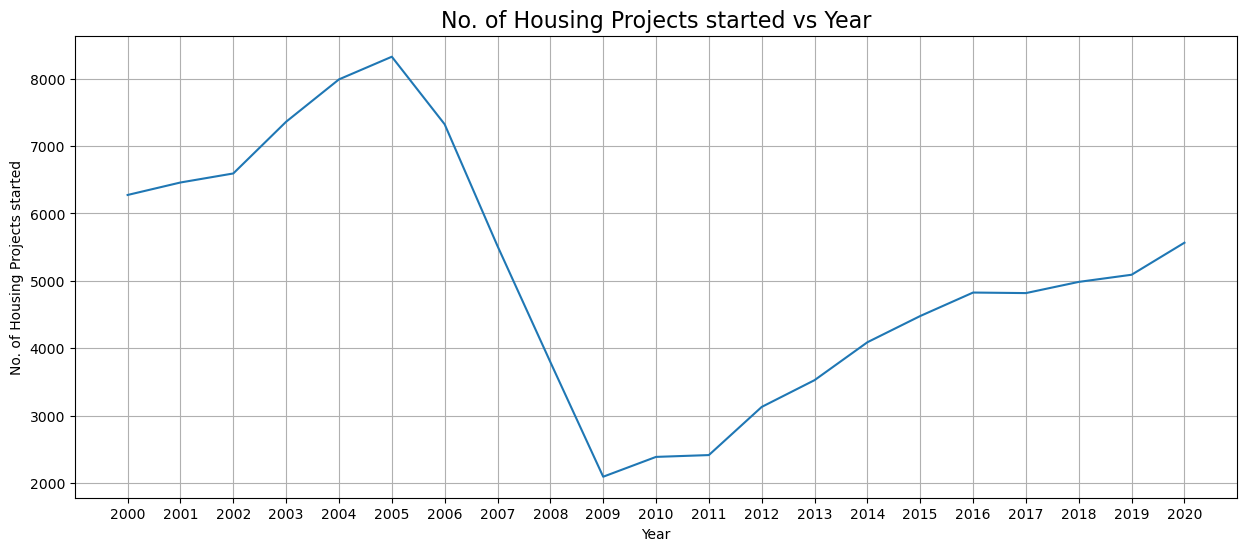

In [25]:
plt.figure(figsize=(15, 6))
plt.plot(house_start_grp)

plt.grid(True)

plt.xticks(np.arange(2000, 2021))

plt.xlabel("Year")
plt.ylabel("No. of Housing Projects started")
plt.title("No. of Housing Projects started vs Year", fontsize=16)

plt.show()


Note: <b> The maximum number of housing projects started hits maximum in the year `2005` and hits minimum in the year `2009`.

##### Number of houses sold in the year 2000-2020

In [26]:
df_house_sold_grp = df.groupby("year")["Homes_Sold"].sum()
df_house_sold_grp

year
2000    3534
2001    3596
2002    3778
2003    4323
2004    4744
2005    5188
2006    4203
2007    3283
2008    2033
2009    1480
2010    1341
2011    1229
2012    1416
2013    1706
2014    1724
2015    2005
2016    2296
2017    2366
2018    2428
2019    2668
2020    3268
Name: Homes_Sold, dtype: int64

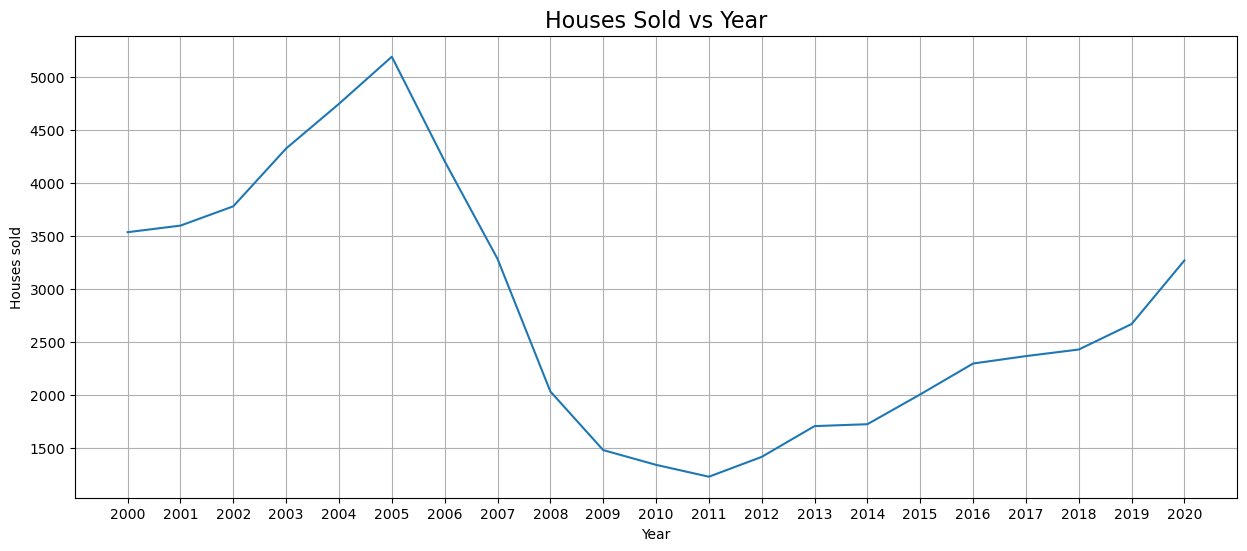

In [27]:
plt.figure(figsize=(15, 6))
plt.plot(df_house_sold_grp)

plt.grid(True)

plt.xticks(np.arange(2000, 2021))

plt.xlabel("Year")
plt.ylabel("Houses sold")
plt.title("Houses Sold vs Year", fontsize=16)

plt.show()

Note: <b>The number of houses sold hits `max` in the year `2005` and hits `minimum` in the year `2011`

##### Barplot of quarterly GDP for years 2000-2020 

In [28]:
gdp_grp = df.groupby(["year", "month"])["GDPC1"].sum()
gdp_grp_df = pd.DataFrame(gdp_grp)

<Axes: xlabel='year'>

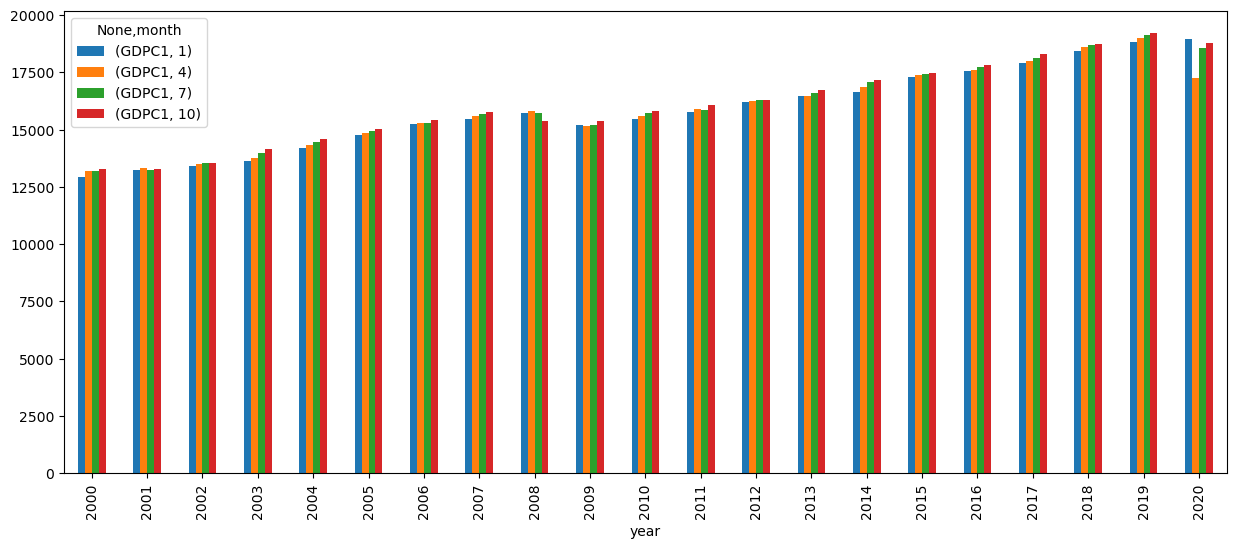

In [29]:
gdp_grp_df.unstack().plot(kind="bar", figsize=(15, 6))

Note: <b> the US GDP is increasing yoy from the year 2000 to the year 2020</b>

### Correlation Heatmap

<Axes: >

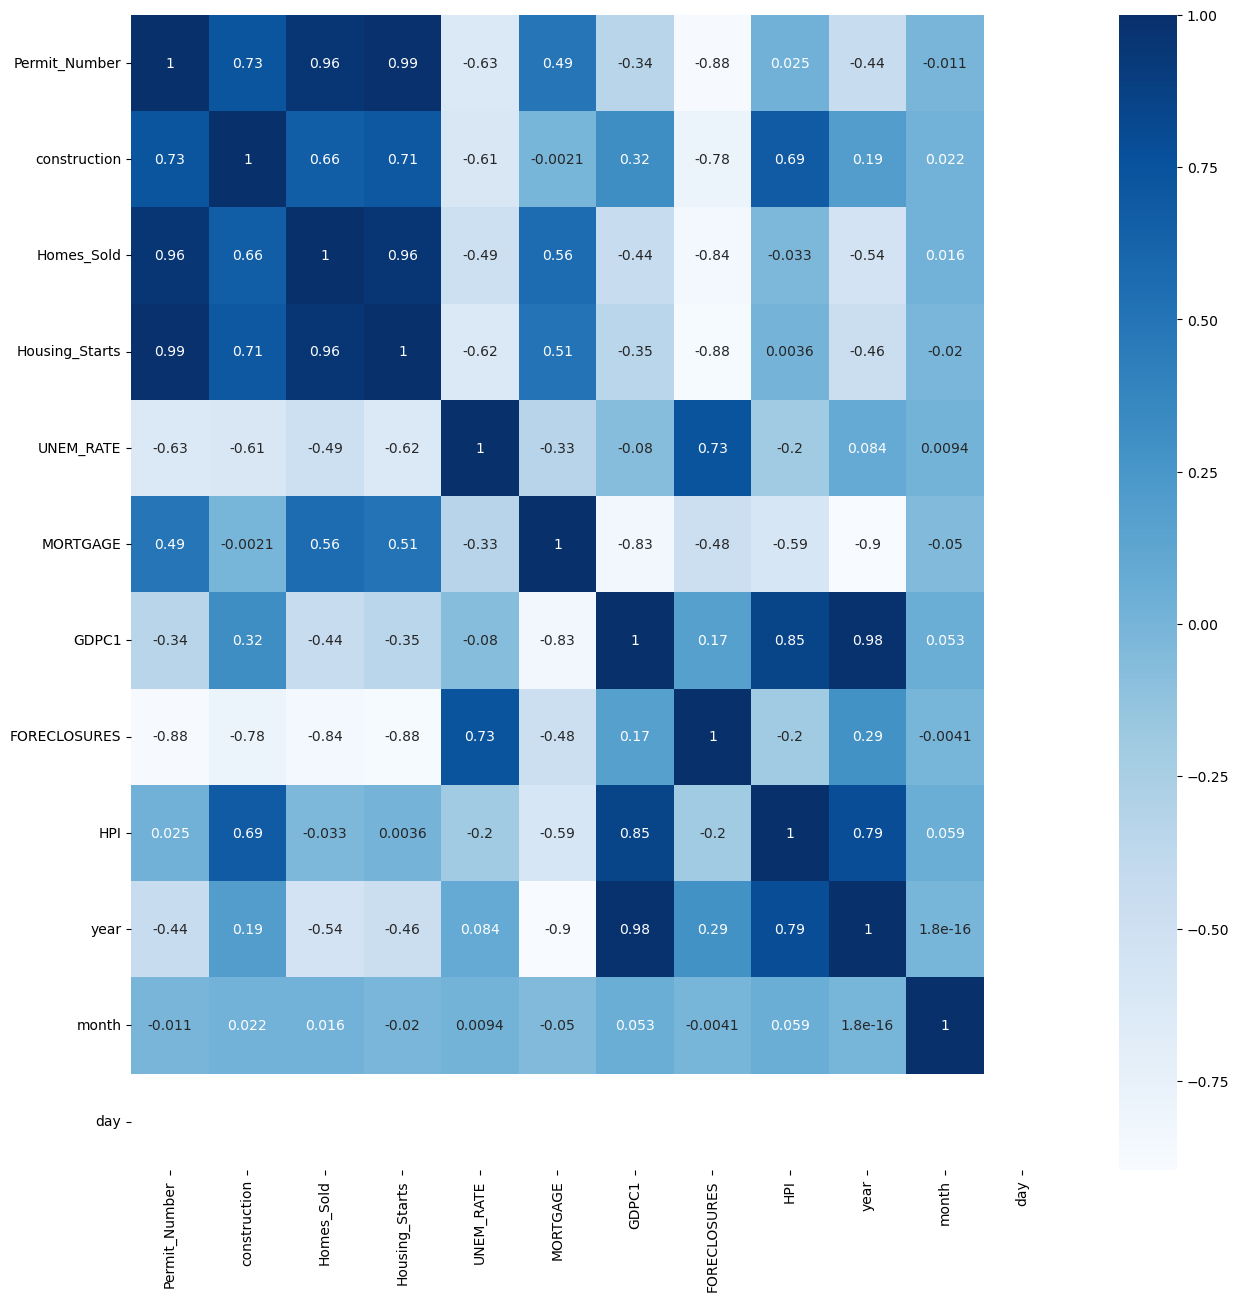

In [30]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), cmap="Blues", annot=True)

Note : <b> The dependent variable has `high correlation` with the `month`,`GPD` and `construction spending`</b>

## Model Building

In [31]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import confusion_matrix

from sklearn.impute import SimpleImputer

In [32]:
X = df.drop("HPI", axis=1)
y = df["HPI"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [33]:
print(X_train.shape)
print(X_test.shape)

(58, 11)
(26, 11)


In [34]:
from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler()
scaled_X_train = pd.DataFrame(mm.fit_transform(X_train), columns=X_train.columns)
scaled_X_test = pd.DataFrame(mm.transform(X_test), columns = X_test.columns)

### Random Forest Regressor

In [35]:
my_pipeline = Pipeline(steps=[("model", RandomForestRegressor())])

scores = -1 *cross_val_score(my_pipeline, X_train, y_train, cv=10, scoring="neg_mean_absolute_error")

print("MAE Scores: ", scores)

MAE Scores:  [ 1.60911667  2.18926667 12.25213333  4.52473333  4.92015     6.74335
  3.17718333  4.55193333  6.77806     1.84276   ]


In [36]:
rfr = RandomForestRegressor()

rfr.fit(X_train, y_train)

y_preds_rfr = rfr.predict(X_test)

r2_score(y_test, y_preds_rfr)

0.9882968380758377

In [37]:
rfr.feature_importances_

array([0.0121438 , 0.27244477, 0.01592396, 0.01048576, 0.07538157,
       0.0160045 , 0.22603431, 0.02299645, 0.34733873, 0.00124615,
       0.        ])

In [38]:
feat_imp_df = pd.DataFrame({"Feature Importances":rfr.feature_importances_, "Column":X_train.columns})

In [39]:
feat_imp_df = feat_imp_df.sort_values(by="Feature Importances",ascending=False)

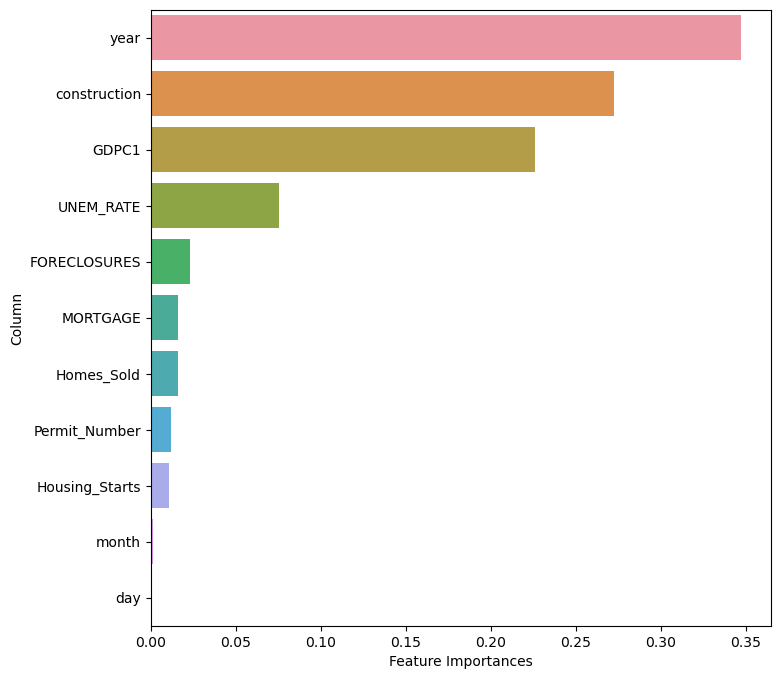

In [40]:
plt.figure(figsize=(8, 8))
sns.barplot(x="Feature Importances", y="Column", data=feat_imp_df)
plt.show()

### Linear Regression

#### OLS Method

In [41]:
import statsmodels.api as sm
x= df.drop("HPI",axis=1)
x = sm.add_constant(x)

res = sm.OLS(y, x).fit()

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                    HPI   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     466.0
Date:                Sun, 03 Sep 2023   Prob (F-statistic):           6.68e-62
Time:                        20:49:07   Log-Likelihood:                -231.32
No. Observations:                  84   AIC:                             484.6
Df Residuals:                      73   BIC:                             511.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Permit_Number     -0.0247      0.008     -3.

Note: <b>`MORTGAGE`, `Housing_Starts`, and `Homes Sold` have p-values greater than 0.05. SO we will take those columns out for OLS modeling</b>

In [42]:
x = x.drop(["MORTGAGE", "Housing_Starts", "Homes_Sold"], axis=1)

In [49]:
res2=sm.OLS(y, x).fit()
print(res2.summary())

                            OLS Regression Results                            
Dep. Variable:                    HPI   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     666.1
Date:                Sun, 03 Sep 2023   Prob (F-statistic):           1.80e-65
Time:                        20:49:58   Log-Likelihood:                -232.96
No. Observations:                  84   AIC:                             481.9
Df Residuals:                      76   BIC:                             501.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Permit_Number    -0.0271      0.003     -8.201

In [43]:
my_pipeline = Pipeline(steps = [("model", LinearRegression())])
scores = -1 * cross_val_score(my_pipeline, X_train, y_train,cv=10, scoring="neg_mean_absolute_error")

print("MAE scores", scores)

MAE scores [3.48024983 3.95622931 2.41505519 3.127785   2.74508554 5.34296537
 3.09299537 4.39725437 3.47918864 5.03779374]


##### First Linear Regression Model

In [44]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_preds_lr = lr.predict(X_test)

print(r2_score(y_test, y_preds_lr))

0.9728065677833763


##### Second Linear Regression Model

In [51]:
X_train_lr = X_train.drop(["Homes_Sold", "Housing_Starts", "MORTGAGE"], axis=1)
X_test_lr = X_test.drop(["Homes_Sold", "Housing_Starts", "MORTGAGE"],axis=1)

lr2 = LinearRegression()
lr2.fit(X_train_lr, y_train)

y_preds_lr_2 = lr2.predict(X_test_lr)

print(r2_score(y_test, y_preds_lr_2))

0.973316045109553


In [55]:
lr_importance = lr2.coef_

lr_feat_imp = pd.DataFrame({"Column":X_train_lr.columns, "Coefficient":lr_importance})
lr_feat_imp = lr_feat_imp.sort_values(by="Coefficient", ascending=False)
lr_feat_imp

,Column,Coefficient
2,UNEM_RATE,6.570577
3,GDPC1,0.031993
1,construction,0.000173
7,day,0.000000
0,Permit_Number,-0.025210
6,month,-0.356749
4,FORECLOSURES,-2.284920
5,year,-6.422414


<Axes: xlabel='Column', ylabel='Coefficient'>

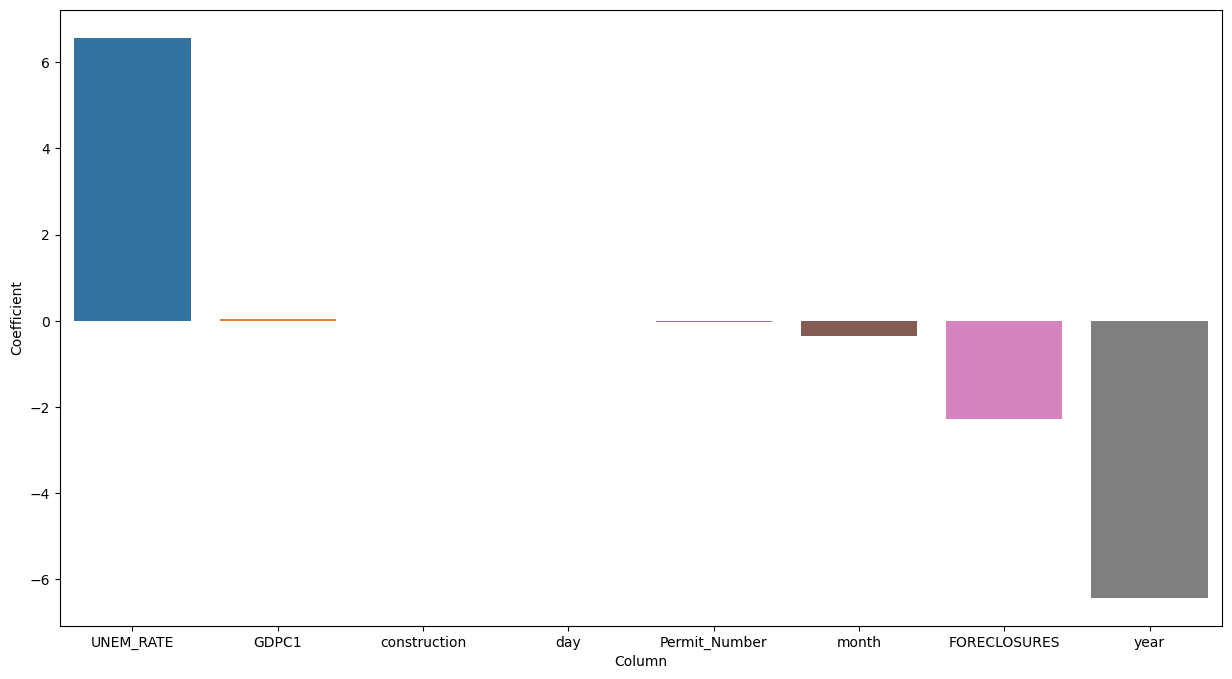

In [60]:
plt.figure(figsize=(15, 8))
sns.barplot(x="Column", y="Coefficient", data=lr_feat_imp)

### Gradient Boosting Regressor

In [45]:
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)

y_preds_gbr = gbr.predict(X_test)

print(r2_score(y_test, y_preds_gbr))

0.9921266901457119


In [46]:
gbr.feature_importances_

array([3.16972705e-03, 3.63468125e-01, 3.48041674e-03, 2.66587244e-03,
       6.32129938e-02, 2.57680023e-02, 1.93899622e-01, 2.76060079e-02,
       3.16521869e-01, 2.07363889e-04, 0.00000000e+00])

In [61]:
feat_imp_gbr_df = pd.DataFrame({"Feature Importances":gbr.feature_importances_, "Column":X_train.columns})
feat_imp_gbr_df = feat_imp_gbr_df.sort_values(by="Feature Importances", ascending=False)
feat_imp_gbr_df

,Feature Importances,Column
1,0.363468,construction
8,0.316522,year
6,0.193900,GDPC1
4,0.063213,UNEM_RATE
7,0.027606,FORECLOSURES
5,0.025768,MORTGAGE
2,0.003480,Homes_Sold
0,0.003170,Permit_Number
3,0.002666,Housing_Starts
9,0.000207,month


<Axes: xlabel='Feature Importances', ylabel='Column'>

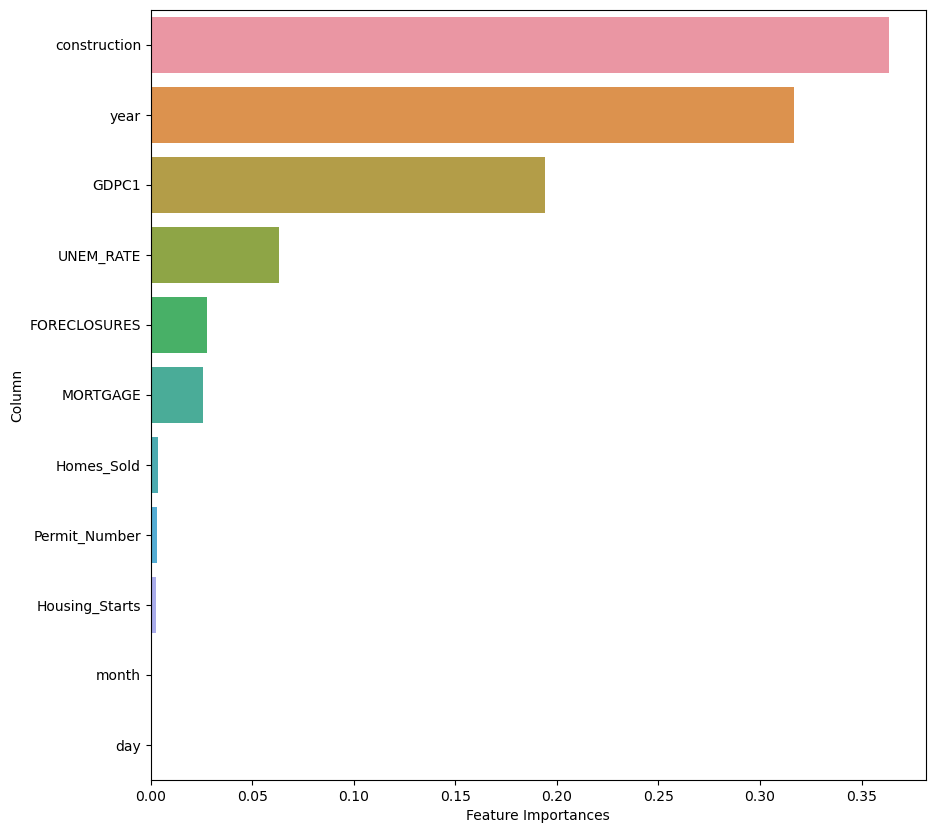

In [48]:
plt.figure(figsize=(10, 10))

sns.barplot(x="Feature Importances", y="Column", data=feat_imp_gbr_df)

## Project Report and Findings

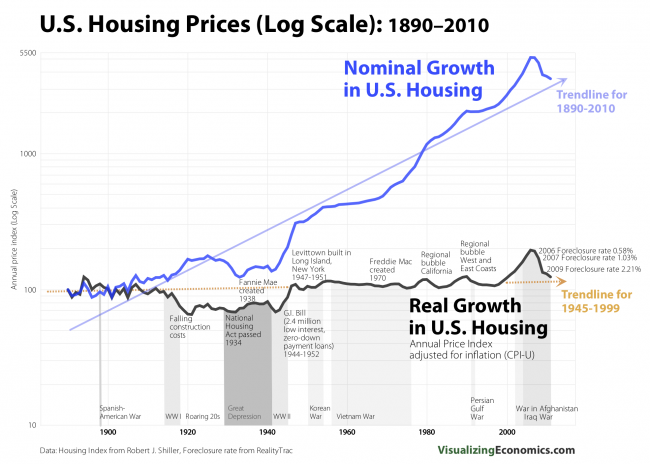

The `S&P CoreLogic Case-Shiller Home Price Indices` are the leading measures of U.S. residential real estate prices, tracking changes in the value of residential real estate nationally.

<br>
<br>
<b>Now, here are the findings for the given project!</b>
<br>
<br>

Upon running three different model (Linear Regression, Random Forest Regressor, Gradient Boosting Regressor), interesting results came up. 

## Model Performance (Lowest to Highest)

####  Linear Regression
For <b>Linear Regression</b>, two separate models were ran and decent R2 scores were retrieved. On the 1st model, an R2 score of 0.972 was obtained. On running the OLS method, it was found that 3 independent variables had p-values greater than 0.05. So, a second model was run without these variables, and a better R2 score was obtained (0.9733) but it was not that great a jump from the previous model. 

Also, according to the coefficients of the independent variables, the most positive correlation is with `UNEMPLOYMENT RATE` and the the most negative correlation is with the `Year` variable. 


#### Random Forest Regressor

In the case of <b> Random Forest Regressor</b>, an R2 score of 0.9882 is obtained. According to the feature importances graph (Descending Order), the most important feature came out to be the `Year` variable. This means that the HPI depends the most on the `Year` variable. A close second is the `construction spending` and the next in line is the `quarterly GDP` of the United States.

#### Gradient Boosting Regressor (Best Model)

With Gradient Boosting Regressor, the results were quite impressive. An R2 score of 0.992 is retrieved, and not to forget the feature importances. With `construction spending` having the highest importance with a score of `0.363`, `year` and `quarterly GDP` come second and third consequently.

## EDA Findings

As the HPI decreases from the year 2007 to the year 2012, the construction spending also decreases, and two independent variables, namely `Homes Sold` and `Housing Starts` also have a downward trend. Even though HPI is not at its peak, the construction spending hits its maximum in the year 2006 showing that inflation is present. 
In the year 2005, maximum number of housing projects have been started in the year 2005, and the highest number of homes have been sold in the same year meaning that HPI does not have a direct influence on these variables.

### What does it all mean?

According to the best model, construction spending has greatest influence on the House Price Index (HPI), which means that the greater the money spent on constructing the houses, the higher is the affect on the HPI. 
Also, the more recent the homes are built, HPI tends have to be on an upward trend, obviously with a lesser influence than the construction spending. Similarly, quarterly GDP is also important in influencing the HPI in the past 20 years.

